# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

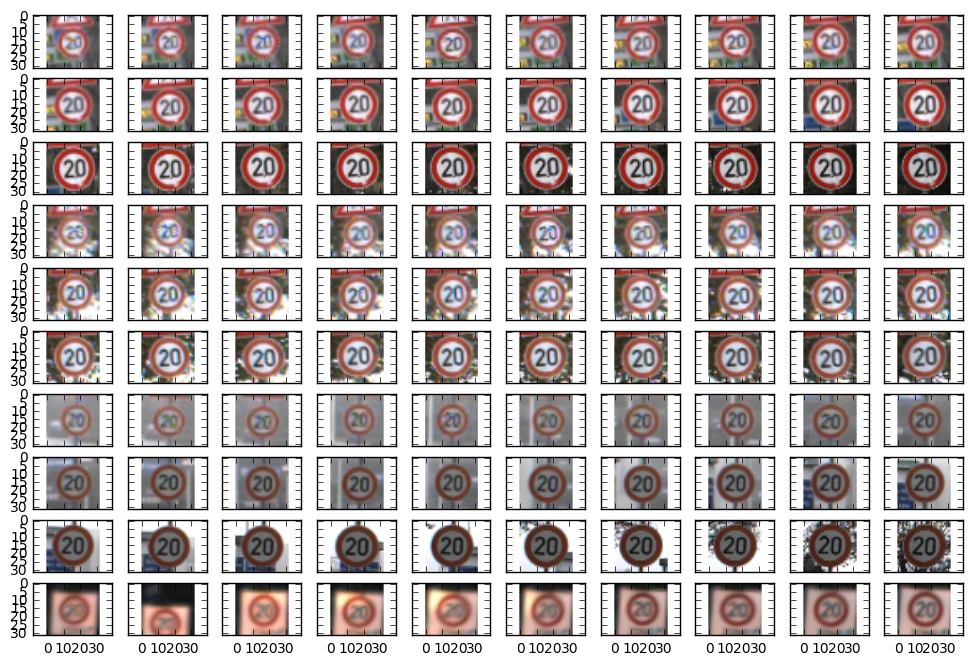

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

## Take a set of images to visualize them
sample_images = train['features'][0:100]

##Plot the images
_,ax = plt.subplots(10,10, sharex=True, sharey=True,figsize=(12,8))
for i, feature in enumerate(sample_images):
    ax[i // 10, i % 10].imshow(feature)

In [4]:
## Counting the number of examples per class
from collections import defaultdict

counts = defaultdict(lambda: 0)

## Iterate the labels and add the count in the dictionary
for label in train['labels']:
    counts[label] +=1
    
for key in counts.keys():
    print("Number of examples for label {} are : {}".format(key, counts[key]))

Number of examples for label 0 are : 210
Number of examples for label 1 are : 2220
Number of examples for label 2 are : 2250
Number of examples for label 3 are : 1410
Number of examples for label 4 are : 1980
Number of examples for label 5 are : 1860
Number of examples for label 6 are : 420
Number of examples for label 7 are : 1440
Number of examples for label 8 are : 1410
Number of examples for label 9 are : 1470
Number of examples for label 10 are : 2010
Number of examples for label 11 are : 1320
Number of examples for label 12 are : 2100
Number of examples for label 13 are : 2160
Number of examples for label 14 are : 780
Number of examples for label 15 are : 630
Number of examples for label 16 are : 420
Number of examples for label 17 are : 1110
Number of examples for label 18 are : 1200
Number of examples for label 19 are : 210
Number of examples for label 20 are : 360
Number of examples for label 21 are : 330
Number of examples for label 22 are : 390
Number of examples for label 2

In order to check the distribution of labels, let's plot the lables and check the relative number of examples per class

In [5]:
import numpy as np
from scipy import ndimage
np.random.seed(111)

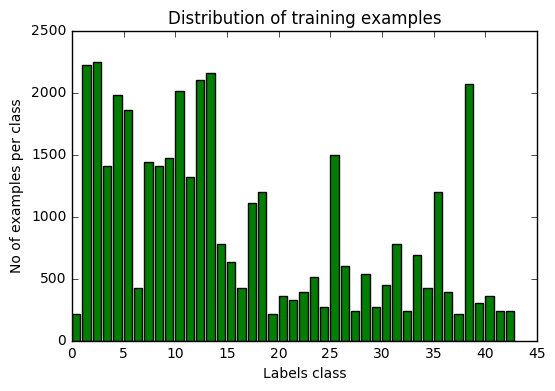

In [6]:
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

examples_per_class = np.bincount(y_train)
max_examples = np.max(examples_per_class)

plt.figure()
plt.title('Distribution of training examples')
plt.xlabel('Labels class')
plt.ylabel('No of examples per class')
plt.bar(range(len(examples_per_class)), examples_per_class, color='green')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [8]:
## Generte additional data in order to make sure that each class has relatively enough examples

## Image augmentation can be done by rotating the images at different angles 
rotations = [-5, 5, -10, 10, -15, 15, -20, 20]

for i in range(len(examples_per_class)):
    ratio = min(int(max_examples / examples_per_class[i]) - 1, len(rotations) - 1)
    if ratio <=1:
        continue
        
    new_features = []
    new_labels = []
    mask = np.where(y_train == i)
    
    for j in range(ratio):
        for feature in X_train[mask]:
            new_features.append(ndimage.rotate(input=feature, angle=rotations[j], reshape=False))
            new_labels.append(i)
            
    train['features'] = np.append(train['features'], new_features, axis=0)
    train['labels'] = np.append(train['labels'], new_labels, axis=0)

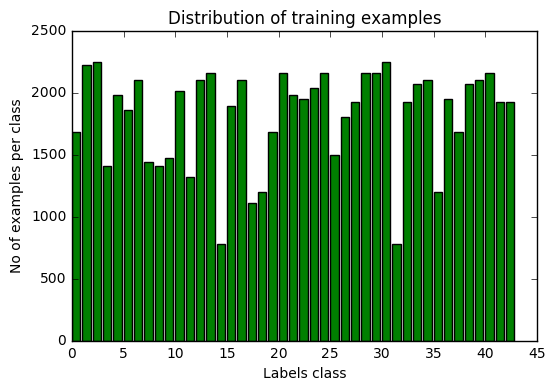

In [9]:
# Check the distribution again
examples_per_class = np.bincount(train['labels'])

plt.figure()
plt.title('Distribution of training examples')
plt.xlabel('Labels class')
plt.ylabel('No of examples per class')
plt.bar(range(len(examples_per_class)), examples_per_class, color='green')
plt.show()

As we can see that now we have enough training examples for each of the 43 class.

In [10]:
import cv2
import pandas as pd

# Now process all the images in training and test datasets
processed_images = []

## Process the images in training datset
for image in train['features']:
    pro_image = np.copy(image)
    pro_image = cv2.normalize(image, pro_image, 0., 1., cv2.NORM_MINMAX, cv2.CV_32F)
    processed_images.append(pro_image)

## Assign the processed features to original features    
train['features'] = np.array(processed_images)

processed_images = []

for image in test['features']:
    pro_image = np.copy(image)
    pro_image = cv2.normalize(image, pro_image, 0., 1., cv2.NORM_MINMAX, cv2.CV_32F)
    processed_images.append(pro_image)

## Assign the processed test features to original features
test['features'] = np.array(processed_images)

train['labels'] = np.array(pd.get_dummies(train['labels'], columns=[0]))
test['labels'] = np.array(pd.get_dummies(test['labels'],columns=[0]))


### Question 1

*Describe how you preprocessed the data. Why did you choose that technique?*

**Answer:**

I only chose to normalize the raw pixels of my images in order to have the values of pixels between 0 and 1 only. 
I chose this as the only processing step for my features because of the following reasons :

* The images have already been resized so we don't need to reshape them again.
* I can apply greyscaling but again it is not at all required if I am going to use CNNs

I used the cv2.normalize() method for processing my features. I chose that because it helps to scale the pixel values in the range 0 and 1

In [11]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.cross_validation import train_test_split

## Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=111)
print("No. of training data points : ", X_train.shape[0])
print("No. of training labels : ", y_train.shape[0])
print("No. of validation data points : ", X_valid.shape[0])
print("No. of validation labels : ", y_valid.shape[0])

/opt/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


No. of training data points :  62493
No. of training labels :  62493
No. of validation data points :  15624
No. of validation labels :  15624


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

### **Answer:**

I used the scikit-learn train_test_split functionality to split my model into training and validation sets. I chose the validation set in order to tune the hyperparameters for my network. 

Additional data was generated by rotating the images to different angles in order to produce new training examples for those classes which have relatively very few examples in the original dataset as compared to the other classes. The new features were generated with the help of scipy's ndimage.roate() functionality. 

In the new dataset, we have 62493 training data points where in the original dataset we had 39209 data points. This means that we have 1.5x more training examples now.

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

In [13]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def init_bias(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

def convLayer(x, w, b, stride=1):
    l = (tf.nn.conv2d(x, w, strides=[1, stride, stride, 1], padding='SAME') + b)
    return tf.nn.relu(l)

def model(X, weights, bias, p_keep_conv, p_keep_hidden):
    layer1a = convLayer(X, weights['w1'], bias['b1'])
    layer1 = tf.nn.max_pool(layer1a, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    layer1 = tf.nn.dropout(layer1, p_keep_conv)
    
    layer2a = convLayer(layer1, weights['w2'], bias['b2'])
    layer2 = tf.nn.max_pool(layer2a, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    layer2 = tf.nn.dropout(layer2, p_keep_conv)
    
    layer3a = convLayer(layer2, weights['w3'], bias['b3'])
    layer3 = tf.nn.max_pool(layer3a, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    layer3 = tf.reshape(layer3, [-1, weights['w4'].get_shape().as_list()[0]])
    layer3 = tf.nn.dropout(layer3, p_keep_conv)
    
    layer4 = tf.nn.relu(tf.matmul(layer3, weights['w4']) + bias['b4'])
    layer4 = tf.nn.dropout(layer4, p_keep_hidden)
    
    final = tf.matmul(layer4, weights['w_0']) + bias['b_0']
    
    return final

In [14]:
X_train = X_train.reshape(-1,32,32,3)
X_valid = X_valid.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [15]:
X = tf.placeholder('float', [None,32,32,3])                     ## Image shape is 32x32x3
Y = tf.placeholder('float', [None,43])                          ## 43 labels in total for output  

weights = { 'w1'  : init_weights([3,3,3,32]),                   ## 3x3x3 conv ,32 actiavtion maps
            'w2'  : init_weights([3,3,32,64]),                  ## 3x3x32 conv, 64 activation maps   
            'w3'  : init_weights([3,3,64,128]),                 ## 3x3x64 conv, 128 activation maps
            'w4'  : init_weights([128*4*4,512]),                ## FC layer, 2048 inputs 512 outputs
            'w_0' : init_weights([512,43])                      ## FC layer 512 inputs 43 outputs
           }

bias  =   { 'b1'  : init_bias([32]),                        
            'b2'  : init_bias([64]),                         
            'b3'  : init_bias([128]),                      
            'b4'  : init_bias([512]),                     
            'b_0' : init_bias([43])                         
           }

p_keep_conv = tf.placeholder('float')
p_keep_hidden = tf.placeholder('float')
mymodel = model(X, weights, bias, p_keep_conv, p_keep_hidden)

variables = tf.trainable_variables()
l2Loss = tf.add_n([tf.nn.l2_loss(v) for v in variables])*0.001

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(mymodel,Y) + l2Loss) 
                                                                         
train_op = tf.train.AdamOptimizer(1e-3).minimize(cost)
predict_op = tf.argmax(mymodel,1)

batch_size = 256
pred = tf.equal(tf.argmax(mymodel,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The architecture of my final model looks like this :


**Architecture Details** : Foolowing are the details of my architecture:

* **Convolution layers** : I used three convolution layers each with a filter size of 3x3 and stride of 1. Alos, the padding was used in a way that the size of the image in the output and input are same.

* **Relu layers** : I used Relu as my activation layers that provides an element wise activation.

* **Pooling Layers** : For pooling layers, max pooling of 2x2 was used in the architecture for downsampling purpose.

* ** Fully connected Layers** : At the end of the architecture, two fully connected layers were used which provide the final output of the model. The first FC layers has 2048 inputs and 512 outputs while the second FC layer has 512 inputs and 43 outputs as there are 43 labels in all.

* ** Dropout** : In order to control overfitting, dropout technique was adopted with different values for convolution and fully connected layers.

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [17]:
saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.initialize_all_variables())
    
for i in range(20):
    training_batch = zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train)+1, batch_size))
    train_acc = 0
    validation_batch = zip(range(0, len(X_valid), batch_size), range(batch_size, len(X_valid)+1, batch_size))
    val_acc = 0
    batch = zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train)+1, batch_size))
    loss = 0

    for start, end in training_batch:
         loss,_ = sess.run([cost,train_op],feed_dict={X: X_train[start:end], Y: y_train[start:end],p_keep_conv:0.6, p_keep_hidden:0.5})                                                                                 
    
    for start, end in batch:
        train_acc = accuracy.eval(session=sess,feed_dict={X: X_train[start:end], Y: y_train[start:end], 
                                                        p_keep_conv:1.0, p_keep_hidden:1.0})*100
    for start, end in validation_batch:
        val_acc = accuracy.eval(session=sess,feed_dict={X:X_valid[start:end], Y: y_valid[start:end], 
                                                        p_keep_conv:1.0, p_keep_hidden:1.0})*100
    
    print("Epoch: {}  Loss:  {:.4f}  Training accuracy:  {:.3f}  Validation accuracy:  {:.3f}".format(i,loss,train_acc,val_acc))


Epoch: 0  Loss:  2.1367  Training accuracy:  42.188  Validation accuracy:  43.750
Epoch: 1  Loss:  1.7001  Training accuracy:  65.234  Validation accuracy:  63.672
Epoch: 2  Loss:  1.3068  Training accuracy:  80.859  Validation accuracy:  79.297
Epoch: 3  Loss:  1.1110  Training accuracy:  90.234  Validation accuracy:  88.672
Epoch: 4  Loss:  0.9095  Training accuracy:  94.531  Validation accuracy:  93.750
Epoch: 5  Loss:  0.7989  Training accuracy:  96.875  Validation accuracy:  94.141
Epoch: 6  Loss:  0.6838  Training accuracy:  98.047  Validation accuracy:  95.703
Epoch: 7  Loss:  0.6158  Training accuracy:  98.047  Validation accuracy:  96.875
Epoch: 8  Loss:  0.5648  Training accuracy:  98.438  Validation accuracy:  98.047
Epoch: 9  Loss:  0.5602  Training accuracy:  98.438  Validation accuracy:  97.656
Epoch: 10  Loss:  0.5358  Training accuracy:  100.000  Validation accuracy:  98.438
Epoch: 11  Loss:  0.5084  Training accuracy:  99.609  Validation accuracy:  97.266
Epoch: 12  Lo

#### Test the accuracy on test set

In [18]:
accuracy.eval(session=sess,feed_dict={X:test['features'] ,Y:test['labels'] , p_keep_conv:1.0, p_keep_hidden:1.0})*100

94.362682104110718

In [19]:
saver.save(sess, 'myModel.ckpt')

'myModel.ckpt'

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

For training my model, I used the following:
* **Optimizer** - AdamOptimizer : Though RMSProp and Adam gave almost the same performance for about 5 epochs, but after that Adam gave a much better accuracy on the validation set as compared to RMSProp.


* **Learning rate for Adam** : I chose 0.001 as the learning rate for my optimizer and it turned out to be very good learning rate considering the validation accuracy.


* **Batch size** : A batch size of 256 was chosen. Though it would have been better if we would have a much smaller batch size like of 64 but in order to speed up the training process, a larger batch size was chosen


* **Epochs** : Because the model is computationally very expensive to train, I have used only a small number of epochs(=20). But even within 20 epochs I was able to get an accuracy of above 98% on validation set and 95% on test set. Though it seems there is a little overfitting as the test accuracy drops by approx 3%. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I have ben doing Deep learning for a while now, so I knew that the best architecture for my network would be a convolution neural network. Because CNNs are expensive computationally, I tried with two and three convolutional blocks in my model, but finally three convolutional blocks were found to be best considering the resources for compuation and accuracy of the model.

I may have implemented a well known architecture like VGG16 or LeNet5 for this problem but those networks are very expensive 
in terms of computation, hence I preferred to build my own network rather than going for those.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import os

In [21]:
images = glob.glob('images/*.png')
images

['images/80.png',
 'images/hochwasser.png',
 'images/priority.png',
 'images/20.png',
 'images/exclamation.png']

In [22]:
# Read the images 
test_data = []
for image in images:
    image = plt.imread(image)
    test_data.append(image)

In [23]:
processed_images = []

for image in test_data:
    pro_image = np.copy(image)
    pro_image = cv2.normalize(image, pro_image, 0., 1., cv2.NORM_MINMAX, cv2.CV_32F)
    processed_images.append(pro_image)

test_data = np.array(processed_images)    

In [24]:
classifications = sess.run(predict_op, feed_dict={X:test_data, p_keep_conv:1.,p_keep_hidden:1.})

In [25]:
classifications

array([ 5,  9,  1,  0, 18])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The five images chosen for testing the performance of our model are shown below. Second image is not present in the training set but these it chosen in order to check how the model will react to such image. First, third, fourth and fifth are the images that were in our dataset too.

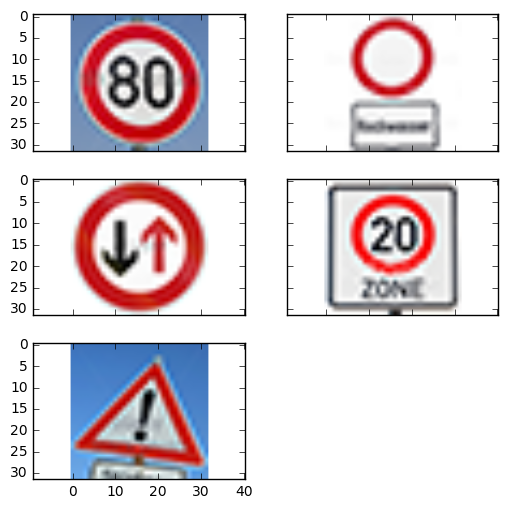

In [26]:
import warnings
warnings.filterwarnings('ignore')
#Plot the images
n= len(test_data)
if n%2 == 0:
    f, ax = plt.subplots(n/2, 2, sharex=True, sharey=True,figsize=(6,6))
else:
    f, ax = plt.subplots(n//2+1, 2, sharex=True, sharey=True, figsize=(6,6))
    
for i in range(n):
    if i%2 == 0:
        ax[i/2, 0].imshow(test_data[i])
    else:
        ax[i/2, 1].imshow(test_data[i])

if n%2!=0:
    f.delaxes(ax[i/2,1])
f.show()    

First, fourth and fith image is classified very accurately by our model. The accuracy of prediction in the case of these three images is 100% which shows that our model has quite learned well. Two images, second and third, has been classified very poorly. The priority sign(third image) has been classified as 'No passing' sign which is not a good prediction at all. 

In [27]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Out of the five images chosen for testing, four images were in the dataset but only three were classified accurately by the model. Hence out of four predictions that really matters here, we got three predicitions correct.

The overall accuracy of our model on these five images is 60% while if we consider only the four images(leaving the one out which was not in the dataset), then the accuracy of our model is 75%. The accuracy of our model on these new images is less as compared to the accuracy of our model on the original test set which was approx. 95%

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [34]:
probabilities= mymodel
prob = probabilities.eval(session=sess, feed_dict={X:test_data, p_keep_conv:1., p_keep_hidden:1.})

In [37]:
print("Top four classifications : ")
print(sess.run(tf.nn.top_k(classifications,4)))
print("\nAnd top four probabilities are : ")
print(sess.run(tf.nn.top_k(prob,k=4)))

Top four classifications : 
TopKV2(values=array([18,  9,  5,  1]), indices=array([4, 1, 0, 2], dtype=int32))

And top four probabilities are : 
TopKV2(values=array([[ 22.62372971,  18.95318794,  15.70258904,  11.61781883],
       [ 21.15991783,  14.78568172,  14.25188637,  11.33141613],
       [  7.85925865,   2.72622824,   2.42654991,   2.40041614],
       [ 15.99334145,  13.41106129,   6.95145941,   3.79287386],
       [ 24.52989197,  16.33740044,  14.35646534,   7.60297632]], dtype=float32), indices=array([[ 5,  2,  1,  3],
       [ 9, 13, 41, 17],
       [ 1, 11, 18, 12],
       [ 0,  1, 14,  8],
       [18, 26, 27, 24]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Because we have four images that were in the dataset too, I chose k=4 in order to check the certainity of predictions. And to my surprise, the model is more certain in case of predicting the 'Priority road' image then the '20kmph' image. Though the lable for '20kmph' has been classified correctly and for the 'Priority road' image, the label has been classified incorrectly by the model, the certainity of model is just opposite in top k predictions. This shows that the model need more fine tuning and more training to achieve better results.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.